In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import math
from cvxpy import *

In [2]:
#small case
case = [30,128,14] # [300, 1280, 50]
m=case[0]
n=case[1] 
k=case[2]

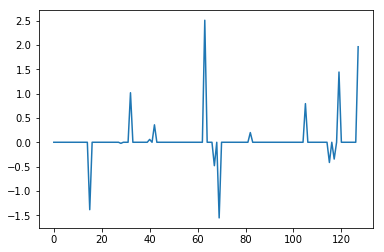

In [3]:
A,Rtmp=np.linalg.qr(np.random.standard_normal((n,m)))
A=A.T
p=np.random.permutation(n)
p=p[0:k]
x0=np.zeros((n,1))
x0[p]=np.random.standard_normal((k,1))
b=np.dot(A,x0)+0.02*np.random.standard_normal((m,1))
plt.plot(x0)
plt.show()
lambda_max=np.linalg.norm(A*b)
lambda0 = 0.1*lambda_max;

In [4]:
def calcres(i,A,b1,b):
    Atemp = np.delete(A,i,1)
    btemp = np.delete(b1,i,0)
    xB = np.reshape(np.dot(Atemp,btemp),(m,1))
    res = b-xB
    return res
def sthresh(l,y):
    if y>l:
        output = y-l
    elif np.abs(y)<=l:
        output = 0
    elif y<(l*-1):
        output =y +l
    return output

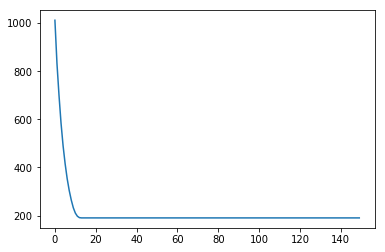

In [5]:
## coordinate descent
#initialize b1 - try both all zeros and try random numbers in std normal
b1 = np.random.uniform(-10,10,(n,1))
j = 0
its = 150
obj1 = np.zeros(its)
stop =False
while j<its:
    for i in range(n):
        res2 = calcres(i,A,b1,b)
        col = A[:,i]
        b1[i] = sthresh(lambda0/(np.dot(col.T,col)),(np.dot(col.T,res2))/(np.dot(col.T,col)))
        
        obj1[j] = (0.5*(sum_squares(A*np.reshape(b1,(n)) - b))+(lambda0*norm(b1,1))).value
    j+=1
plt.plot(obj1)
plt.show()

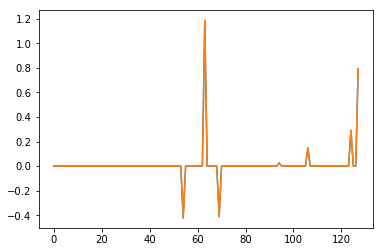

1.71923734307e-08


In [6]:
# Construct the problem.
x = Variable(n)
objective = Minimize(0.5*(sum_squares(A*x - b))+(lambda0*norm(x,1)))
prob = Problem(objective)
result = prob.solve()

plt.plot(np.reshape(b1,(n,1)))
plt.plot(x.value)
plt.show()
print np.linalg.norm((np.reshape(b1,(n,1))-x.value),1)